#Loan Approval

---
**Objective:**
In this exercise, we will explore a dataset of Loan data with the below info. We will try later to predict the status of loan for individuals based the following information.</font>

## DataSet Description

- **Loan_ID:** data set unique ID <br>
- **Gender:** individual gender<br>
- **Married:** individual marital status<br>
- **Dependents:** number of dependents<br>
- **Education:** individual education status<br>
- **Self_Employed:** individual employment status<br>
- **ApplicantIncome:** individual income<br>
- **CoapplicantIncome:** individual Coapplicant income<br>
- **LoanAmount:** Loan amount in thousands<br>
- **Loan_Amount_Term:** term of loan in months<br>
- **Credit_History:** credit history meets guidelines<br>
- **Property_Area:** Urban/ Semi Urban/ Rural<br>
- **Loan_Status:** loan approved (Y/N)<br>

# 1. Import necessary python modules (libraries)
<br>
We will need the following libraries:

- Numpy — for scientific computing (e.g., linear algebra (vectors & matrices)).
- Pandas — providing high-performance, easy-to-use data reading, manipulation, and analysis.
- Matplotlib & seaborn — plotting & visualization.
- scikit-learn — a tool for data mining and machine learning models.

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [95]:
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)
#used to configure the Matplotlib plotting library for inline plotting and to set the default figure size, respectively.

In [96]:
#connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 2. Read & visualize data
To load the data to our code, we use pandas module, more specifically, the read_csv function.

We will use two datasets: the **train.csv** and **test.csv** files

Combine the two dataset in order to apply the same preprocessing steps in both dataframes

In [97]:
df_train= pd.read_csv('/content/drive/My Drive/SDAIA/train.csv')
df_test=pd.read_csv('/content/drive/My Drive/SDAIA/test.csv')

In [98]:
df_train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [99]:
df_test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP002648,Male,Yes,0,Graduate,No,2130,6666,70.0,180,1.0,Semiurban,N
1,LP002652,Male,No,0,Graduate,No,5815,3666,311.0,360,1.0,Rural,N
2,LP002659,Male,Yes,3+,Graduate,No,3466,3428,150.0,360,1.0,Rural,Y


In [100]:
print(df_train.shape)
print(df_test.shape)

(513, 13)
(101, 13)


### **Combine two DataFrames (df_train and df_test) into a single new DataFrame.**

In [101]:
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)
#other way:
#df=df_train.append(df_test)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [102]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [103]:
df.drop(columns="Loan_ID", inplace=True)
# Loan_ID is like index for us, so we drop it.

In [104]:
#Checking
df.head(1)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y


# **3. Exploratory Data Analysis**


**Question 1:** Use the shape function to check the dimensions of your dataframe

In [105]:
df.shape

(614, 12)

##### Using the function info(), we can check:

- data types (int, float, or object (e.g., string))
- missing values
- memory usage
- number of rows and columns

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


### **Question 2:** Which Columns contain Missing Values?

**A:** **(Gender, Married, Dependents, self_Employed, LoanAmount, Loan_Amont_Term, Credit_History) in simple words, any coulmn isn't 0 iy contains null values. But There're v less missing values in Gender, Married, Dependents, Credit_History, and Self_Employed  so we can fill them using the mode of the features.**

In [107]:
print(df.isna().sum().to_string())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0


Here i'm gonna fill the Loan Amount and loan amount term because i need them for viualisation later

In [108]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [109]:
#checking
print(df.isna().sum().to_string())

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History       50
Property_Area         0
Loan_Status           0


In [110]:
#is there any duplicated values?
df.duplicated().sum()
#NO

0

##### Using the function describe(), we can check the following  values for each numerical feature (column)
- mean
- standard deviation
- maximum
- minimum


In [111]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.50,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.00,1188.5,2297.25,41667.0
LoanAmount,614.0,145.752443,84.107233,9.0,100.25,128.0,164.75,700.0
Loan_Amount_Term,614.0,342.410423,64.428629,12.0,360.00,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.00,1.0,1.00,1.0


### **Question 3:** Which feature is not actually numerical and yet was included in the above statistical description?
**A:** **df.describe() only reports statistics for numeric columns. This includes data types like int, float, and datetime. For non-numeric columns, like object (strings) or bool (booleans), describe() won't return any detailed statistics like mean, standard deviation, etc.**

In [112]:
len(df.select_dtypes("number").columns)

5

In [113]:
df.describe(include="object").T
#To check the objects in our data

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [114]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [115]:
np.sort(df.Credit_History.unique())

array([ 0.,  1., nan])

In [116]:
#gives us the relative frequencies (percentages) of each unique term in the Credit_History
df['Credit_History'].value_counts(normalize=True)

1.0    0.842199
0.0    0.157801
Name: Credit_History, dtype: float64

**Question 4:** Write the code to get unique values of the Loan_Amount_Term variable and sort the values

Loan_Amount_Term is a variable of numerical discrete data type

In [117]:
np.sort(df.Loan_Amount_Term.unique())

array([ 12.,  36.,  60.,  84., 120., 180., 240., 300., 360., 480.])

In [118]:
#gives us the relative frequencies (percentages) of each unique term in the Loan_Amount_Term
df['Loan_Amount_Term'].value_counts(normalize=True)

360.0    0.856678
180.0    0.071661
480.0    0.024430
300.0    0.021173
240.0    0.006515
84.0     0.006515
120.0    0.004886
60.0     0.003257
36.0     0.003257
12.0     0.001629
Name: Loan_Amount_Term, dtype: float64

In [119]:
#prints all the column names, followed by all the unique values of each one
for column in df.columns:
    print(f"Column Name : {column}")
    print(df[column].unique())
    print("-------------------------------------------------------------------")
    print()

Column Name : Gender
['Male' 'Female' nan]
-------------------------------------------------------------------

Column Name : Married
['No' 'Yes' nan]
-------------------------------------------------------------------

Column Name : Dependents
['0' '1' '2' '3+' nan]
-------------------------------------------------------------------

Column Name : Education
['Graduate' 'Not Graduate']
-------------------------------------------------------------------

Column Name : Self_Employed
['No' 'Yes' nan]
-------------------------------------------------------------------

Column Name : ApplicantIncome
[ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3

# **Visualisation**

<ipython-input-120-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

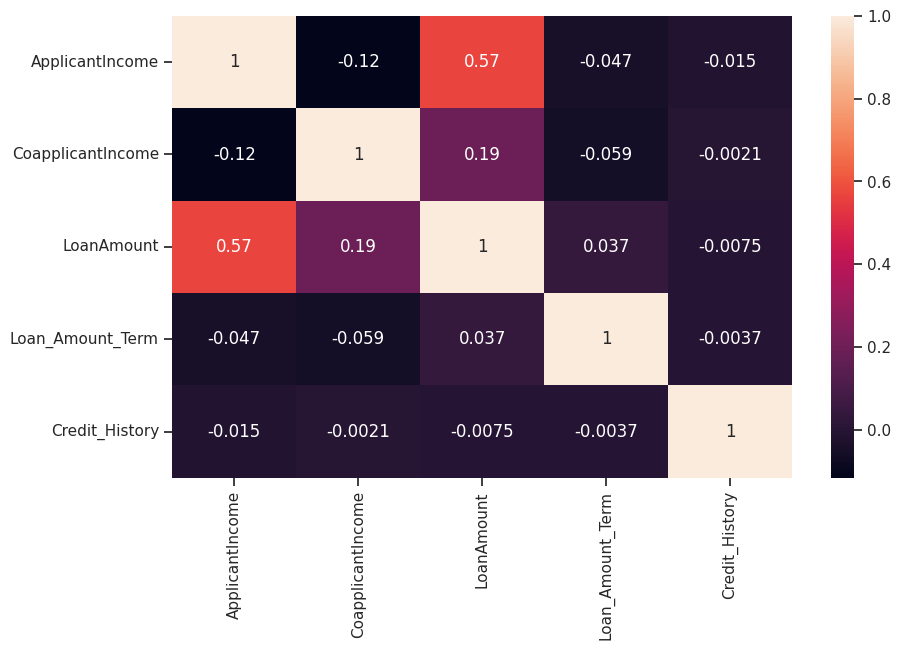

In [120]:
sns.heatmap(df.corr(),annot = True)

#### Remove Na and create a density graph

<ipython-input-121-d84b6f4af2cf>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['LoanAmount']);


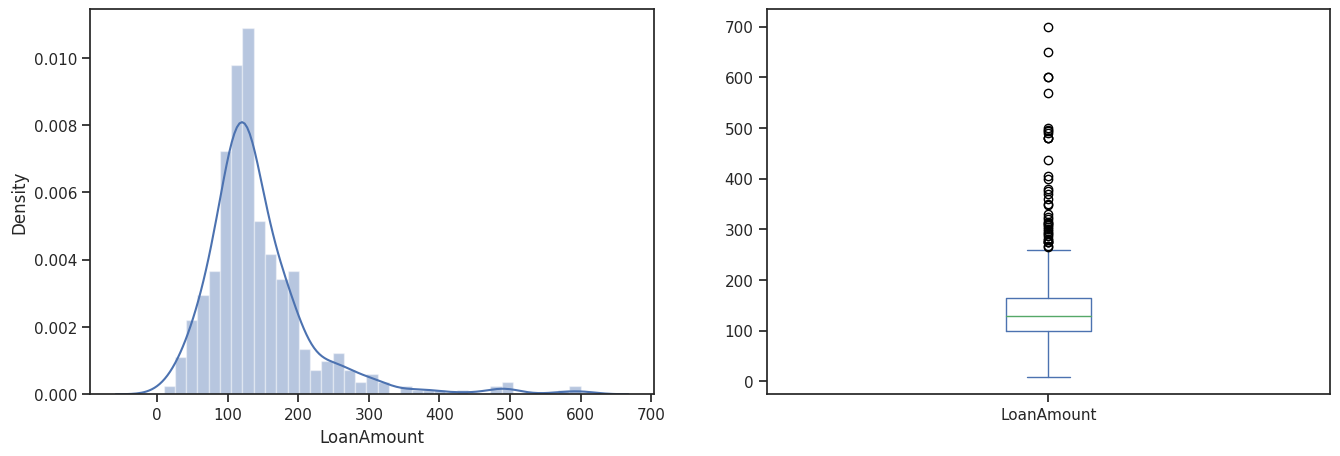

In [121]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['LoanAmount']);
plt.subplot(122)
df['LoanAmount'].plot.box(figsize=(16,5))
plt.show()

**Question 5:** Do you notice any outliers?



***Analysis:***
**yes. These black points are outliers.In this variable, numerous outliers are apparent, yet the distribution appears to be relatively normal. We will address the treatment of these outliers in subsequent sections.**

**Question 6:** Draw the same plots for the ApplicantIncome Feature and check if there are any outliers.

<ipython-input-122-5905ece0b135>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(removeNA_df['ApplicantIncome']);


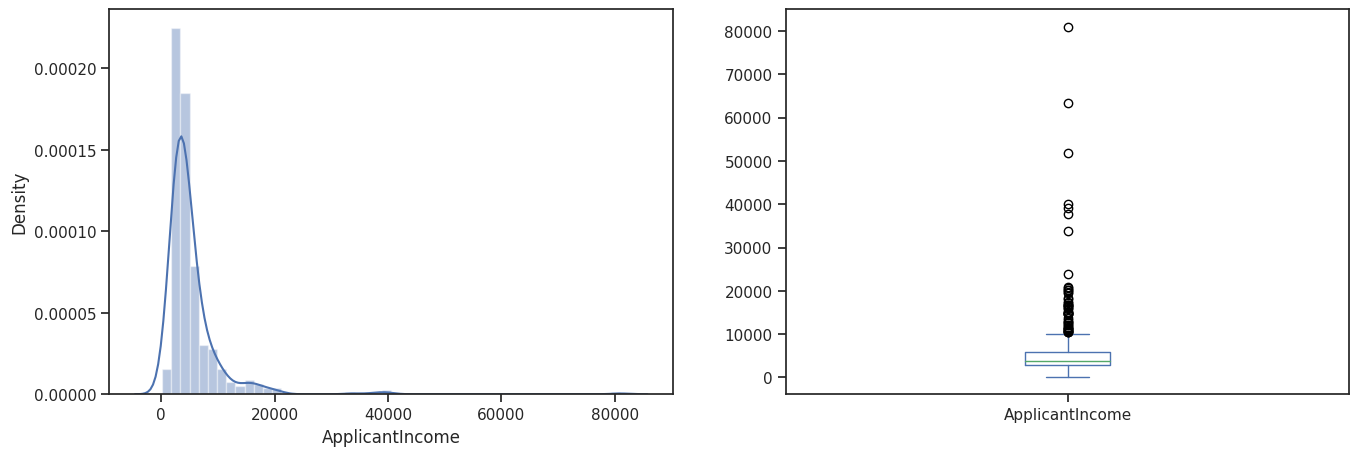

In [122]:
plt.figure(1)
plt.subplot(121)
removeNA_df=df.dropna() # we need to remove Na in order to plot a density graph
sns.distplot(removeNA_df['ApplicantIncome']);
plt.subplot(122)
df['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()
#there's outliers.

### **Plot the (Categorical) featurea**

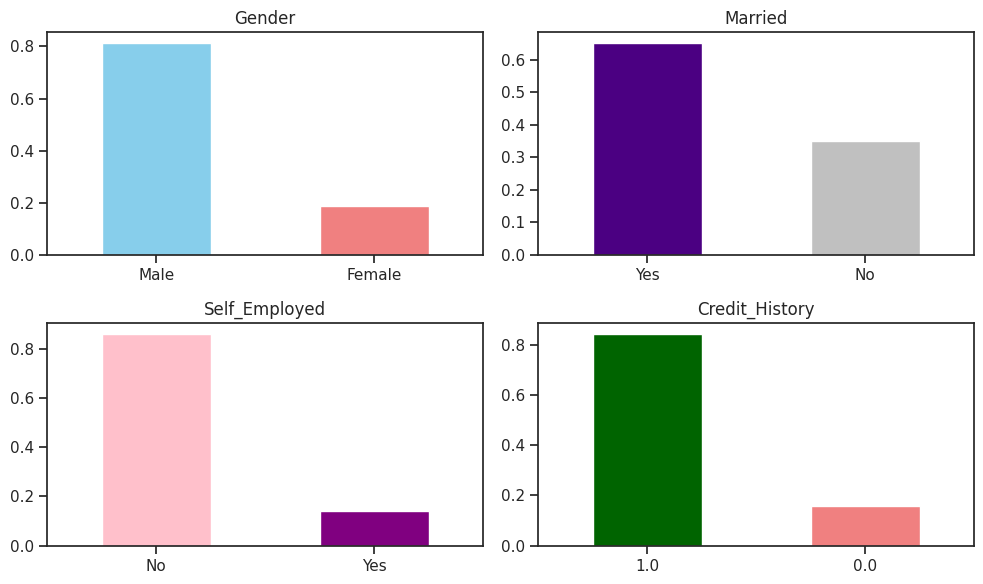

In [123]:
# Plot for 'Gender'
plt.subplot(221)
df['Gender'].value_counts(normalize=True).plot.bar(title='Gender', color=['skyblue', 'lightcoral'])
plt.xticks(rotation=0)
# Plot for 'Married'
plt.subplot(222)
df['Married'].value_counts(normalize=True).plot.bar(title='Married', color=['indigo', 'silver'])
plt.xticks(rotation=0)
# Plot for 'Self_Employed'
plt.subplot(223)
df['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed', color= ['pink', 'purple'])
plt.xticks(rotation=0)
# Plot for 'Credit_History'
plt.subplot(224)
df['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History', color= ['darkgreen', 'lightcoral'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


### **The bar plots above reveal that 80% of the dataset's applicants are male, approximately 65% are married, around 15% are self-employed, and about 85% have successfully repaid their debts.**

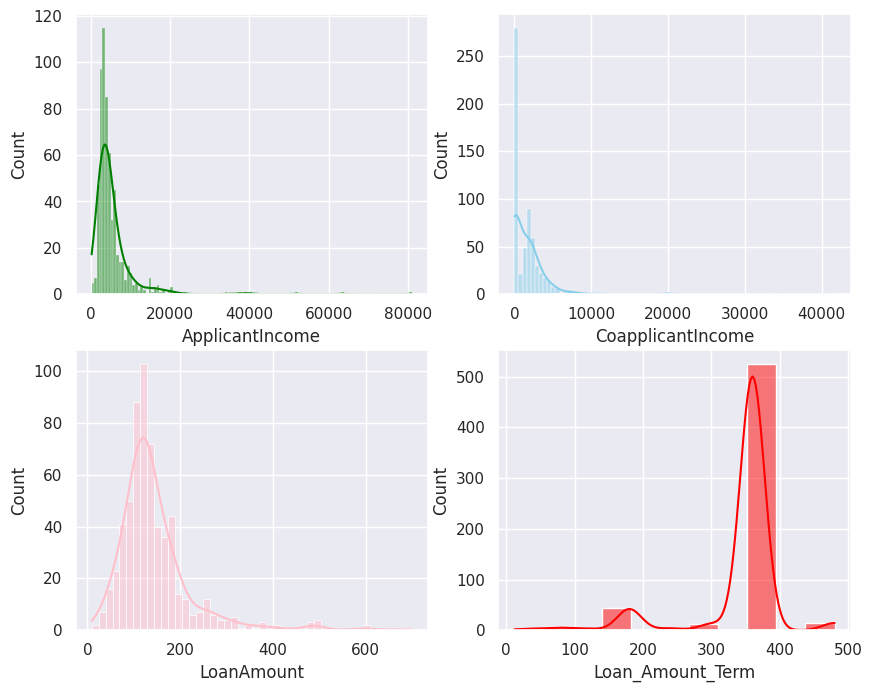

In [124]:
#distbution
sns.set(style="darkgrid")
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[1, 0], color='pink');
sns.histplot(data=df, x="Loan_Amount_Term", kde=True, ax=axs[1, 1], color='red');

**In machine learning, a distribution is a mathematical function that describes the probability of a random variable taking on a particular value. In other words, it describes how the data is spread out.**

### Check if the gender affects the loan approval

Loan_Status         N         Y
Gender                         
Female       0.330357  0.669643
Male         0.306748  0.693252


<Axes: xlabel='Gender'>

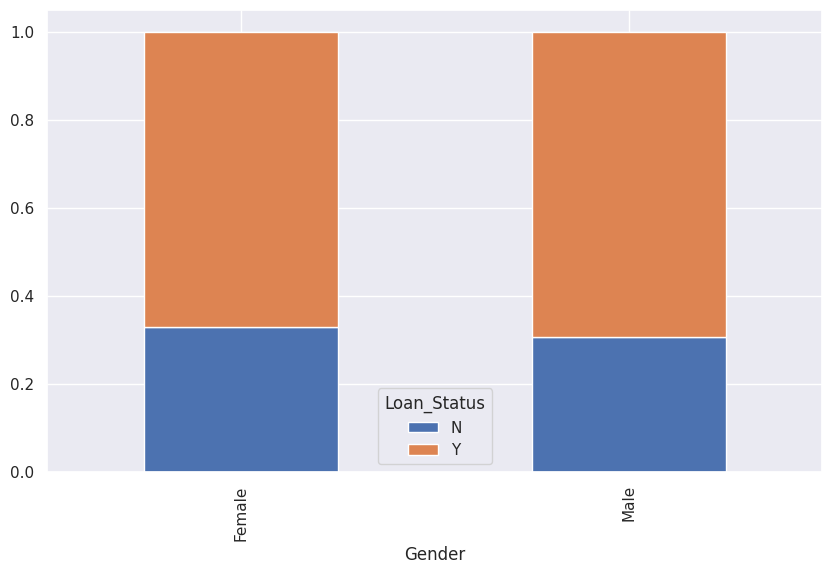

In [125]:
Gender=pd.crosstab(df['Gender'],df['Loan_Status'], normalize='index')
print(Gender)
Gender.plot(kind='bar', stacked=True)

**Question 7:**

a. Does gender affect loan approval?
No. in the plot above, we can see ther is no difference between males and females.

b. Suggest another method to study this relation
other than seeing the correlation, we can scatter plot.

# 4. Preprocessing
"Garbage in, garbage out".
<br>
<br>
Data should be preprocessed and cleaned to get rid of noisy data. Preprocessing includes:

- remove unsued column(s)
- remove grabage data
- convert continous data into categorical
- treat missing data
- encode categorical data
- normalization: normalize data ranges for all features (e.g., between 0 and 1)

## Remove unused columns
Here we will drop some columns we beleive they do not affect the loan approval.

In [126]:
df.drop(['Gender','Self_Employed','ApplicantIncome','LoanAmount','Loan_Amount_Term'], inplace=True, axis=1)

##Convert continous data into categorical

In [127]:
df['Credit_History'] = df['Credit_History'].astype('O')

## Treat missing data
- fill missing categorical data & discrete data with mode
- fill missing continous data with mean


In [128]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

## Check if any null value exist

**Question 8:** Write the code to check for any null values

In [129]:
df.isnull().sum().any()
# No more null values

False

## Encode categorical data

In [130]:
le = LabelEncoder()
cat_data=df[['Credit_History','Dependents','Education','Married','Property_Area','Loan_Status']]
num_data=df[['CoapplicantIncome']]
cat_data.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1.0,0,Graduate,No,Urban,Y
1,1.0,1,Graduate,Yes,Rural,N
2,1.0,0,Graduate,Yes,Urban,Y
3,1.0,0,Not Graduate,Yes,Urban,Y
4,1.0,0,Graduate,No,Urban,Y


In [131]:
for i in cat_data:
    cat_data[i] = le.fit_transform(cat_data[i])
cat_data.head()

<ipython-input-131-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-131-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data[i] = le.fit_transform(cat_data[i])
<ipython-input-131-699cec605dfd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status
0,1,0,0,0,2,1
1,1,1,0,1,0,0
2,1,0,0,1,2,1
3,1,0,1,1,2,1
4,1,0,0,0,2,1


## Combine both cat_data and numerical_data

In [132]:
df = pd.concat([cat_data, num_data], axis=1)
df.head()

,Credit_History,Dependents,Education,Married,Property_Area,Loan_Status,CoapplicantIncome
0,1,0,0,0,2,1,0.0
1,1,1,0,1,0,0,1508.0
2,1,0,0,1,2,1,0.0
3,1,0,1,1,2,1,2358.0
4,1,0,0,0,2,1,0.0


## Normalization

**Question 9:** Normalize data ranges for all features (e.g., between 0 and 1)

In [133]:
from sklearn.preprocessing import MinMaxScaler
# the min max scalar normlize the range between 0 and 1
scalar = MinMaxScaler()
df = pd.DataFrame(scalar.fit_transform(df), columns =df.columns)

print(scalar.fit_transform(df))

[[1.         0.         0.         ... 1.         1.         0.        ]
 [1.         0.33333333 0.         ... 0.         0.         0.03619171]
 [1.         0.         0.         ... 1.         1.         0.        ]
 ...
 [1.         0.33333333 0.         ... 1.         1.         0.00575995]
 [1.         0.66666667 0.         ... 1.         1.         0.        ]
 [0.         0.         0.         ... 0.5        0.         0.        ]]


# 5. Training & Validating

We split the data between training and testing.
Then, we train a model to predict the loan status

In [134]:
input_variables = ['Credit_History','Dependents','Education','Married','Property_Area','CoapplicantIncome']
x = df[input_variables]
y = df['Loan_Status']

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size =0.3)

##Creating & Fitting the model

In [135]:
model=LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

##Validating the model

In [136]:
pred_val = model.predict(x_val)
accuracy_score(y_val,pred_val)

0.8